In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
sim = AerSimulator()

from util import zero, one

# Foundations II: Multi-Qubit Systems

We will introduce **multi-qubit** systems and two keys properties of multi-qubit systems:
1. **exponential representational capacity** and
2. **entanglement**.
We will also show how quantum circuits generalize to the multi-qubit setting.

References
1. [Introduction to Classical and Quantum Computing: Chapter 4](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Combining Quantum Systems

In a classical system, we can combine bits by using the **Cartesian product** on bits.
In a quantum system, we can combine qubits by using the **tensor product**.

### Tensor Product

Let $X \cong \mathbb{C}^n$ and $Y \cong \mathbb{C}^m$ be two complex vector spaces. Then the **tensor product** of $X$ and $Y$, written $X \otimes Y \cong \mathbb{C}^{nm}$ is the vector space

$$
X \otimes Y = \{ x \otimes y | x \in X, y \in Y \}
$$

where

$$
x \otimes y = 
\begin{pmatrix}
x_1y_1 \\
\vdots \\
x_1y_m \\
\vdots \\
x_ny_1 \\
\vdots \\
x_ny_m
\end{pmatrix} \,.
$$

Let's use an example to unpack this definition.

### Two-Qubit System 

Let $X \cong \mathbb{C}^2$ and $Y \cong \mathbb{C}^2$. Then

$$
\mathbb{C}^4 \cong X \otimes Y = \{ x \otimes y | x \in \mathbb{C}^2, y \in \mathbb{C}^2 \} \,.
$$

#### Example element

We can use the above definition to compute the result of combining a $|0\rangle$ qubit with a $|1\rangle$ qubit.

\begin{align*}
|0\rangle \otimes |1\rangle & = \begin{pmatrix}
1 \\
0 \\
\end{pmatrix} \otimes \begin{pmatrix}
0 \\
1 \\
\end{pmatrix} 
= \begin{pmatrix}
1 \cdot 0  \\
1 \cdot 1 \\
0 \cdot 0  \\
0 \cdot 1 \\
\end{pmatrix}
= \begin{pmatrix}
0 \\
1 \\
0 \\
0 \\
\end{pmatrix}
\end{align*}

In [2]:
zero ^ one   # ^ is the tensor product

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


#### Little Endian

We will write multi-qubit systems using **Little Endian**, i.e., the most significant qubit is on the left and the least significant is on the right. Little Endian notation is the one that matches with the order given by the tensor product. For example,

\begin{align*}
|01\rangle & = |0\rangle \otimes |1\rangle \\
& = |q_1 q_0\rangle
\end{align*}

In [3]:
(zero ^ one).draw("latex")

<IPython.core.display.Latex object>

#### Computational Basis

The following vectors form a **computational basis** for a 2-qubit system:
1. $|00\rangle = |0\rangle \otimes |0\rangle$
2. $|01\rangle = |0\rangle \otimes |1\rangle$
3. $|10\rangle = |1\rangle \otimes |0\rangle$
4. $|11\rangle = |1\rangle \otimes |1\rangle$.

This means that every quantum state vector in $|q\rangle \in \mathbb{C}^4$ can be written as a linear combination of $|00\rangle$, $|10\rangle$, $|01\rangle$ and $|11\rangle$:

$$
|q\rangle = \alpha_1|00\rangle + \alpha_2|10\rangle + \alpha_3|01\rangle + \alpha_4|11\rangle
$$

where $|\alpha_1|^2 + |\alpha_2|^2 + |\alpha_3|^2 + |\alpha_4|^2 = 1$.

In [4]:
print("|00>", zero ^ zero) # ^ is the tensor product
print("|01>", zero ^ one)
print("|10>", one ^ zero)
print("|11>", one ^ one)

|00> Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
|01> Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
|10> Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
|11> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


### Three Qubit System

Let $X \cong \mathbb{C}^4$ be a two qubit system and $Y \cong \mathbb{C}^2$ a single qubit system. Then a three qubit system is defined as

$$
\mathbb{C}^8 \cong X \otimes Y = \{ x \otimes y | x \in \mathbb{C}^4, y \in \mathbb{C}^2 \} \,.
$$

#### Computational Basis

Every quantum state vector in $\mathbb{C}^8$ can be written as a linear combination of $|000\rangle$, $|010\rangle$, $|001\rangle$,  $|011\rangle$, $|100\rangle$, $|110\rangle$, $|101\rangle$ and $|111\rangle$.

In [5]:
print("|000>", zero ^ zero ^ zero)
print("|001>", zero ^ zero ^ one)
print("|010>", zero ^ one ^ zero)
print("|011>", zero ^ one ^ one)
print("|100>", one ^ zero ^ zero)
print("|101>", one ^ zero ^ one)
print("|110>", one ^ one ^ zero)
print("|111>", one ^ one ^ one)

|000> Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|001> Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|010> Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|011> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|100> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|101> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|110> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
|111> Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j],
            dims=(2, 2, 2))


### Multi-Qubit System

A system with $n$-qubits $Q(n)$ is defined can be defined inductively as

1. inductive case:

$$
Q(n) = \{ |q_2\rangle \otimes |q_1\rangle : |q_2\rangle \in Q(1), |q_1\rangle \in Q(n-1) \}
$$

2. and base case:

$$
Q(1) = \{ |q\rangle \in \mathbb{C}^2 : \lVert q \rVert = 1 \} \,.
$$

Every quantum state vector $\psi \in Q(n)$ can be written as a linear combination 

$$
|\psi\rangle = \sum_{i=0}^{N-1} \alpha_i |\overline{i}\rangle
$$

such that $\sum_i |\alpha_i|^2 = 1$. Here, $|\overline{i}\rangle$ is the computational basis associated with the binary expanion of $i$ in $n$ bits.

#### Exponential representation capacity

A multi-qubit quantum system has an exponential representation capacity.
1. 1-qubit system has $2^1 = 2$ bases. Thus we can fully specify a quantum state with $2 -1$ amplitudes.
2. 2-qubit system has $2^2 = 4$ bases. Thus we can fully specify a quantum state with $4 - 1$ amplitudes.
3. 3-qubit system has $2^3 = 8$ bases. Thus we can fully specify a quantum state with $8 - 1$ amplitudes.
4. n-qubit system has $N = 2^n$ bases, an exponential number of bases. Thus we can fully specify a quantum state with $N - 1$ amplitudes.

## Entanglement 

The potential speedup that quantum computation has over classical computation will boil down to whether or not we can harness this exponential representational advantage without using an exponential number of operations. Luckily for us, this is possible due to **entanglement**. Two qubits are said to be **entangled** if they cannot be written as the tensor product of two single qubit systems.

### Example: Independent State

Let's begin by visualizing a 2 qubit system, where intuitively, the 2 qubits do not interact. This is possible with two Bloch spheres.

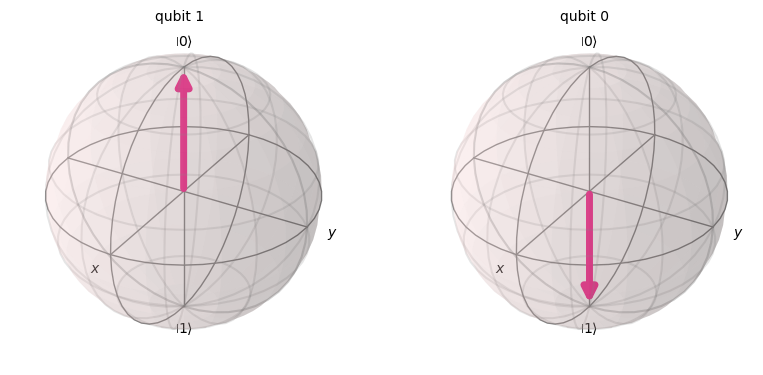

In [6]:
# Classical intuition: zero and one are independent
# Thus we can visualize each qubit in the tensor product independently
plot_bloch_multivector(zero ^ one, reverse_bits=True)

### Example: Entangled State

Now we'll take a look at an entangled state. We'll show in a moment that the state is indeed entangled.

In [7]:
# Creating superposition
q = 1./np.sqrt(2.)*(zero ^ zero) + 1./np.sqrt(2.)*(one ^ one)
q.draw("latex")

<IPython.core.display.Latex object>

If we try to visualize two entangled qubits such as $|q\rangle$ above, our visualization will fail ...

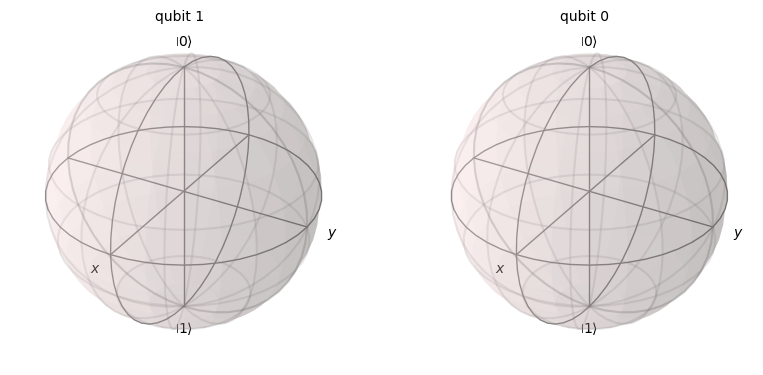

In [8]:
plot_bloch_multivector(q, reverse_bits=True)  # hmm ...

#### Why Entangled?

1. We need to show that $|q\rangle$ cannot be written as a tensor product.
2. So suppose for the sake of contradiction that

$$
\frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

is a tensor product.

This means that

$$
\begin{pmatrix}
a_1 b_1 \\
a_1 b_2 \\
a_2 b_1 \\
a_2 b_2 \\
\end{pmatrix} = \begin{pmatrix}
1/\sqrt{2} \\
0 \\
0 \\
1/\sqrt{2} \\
\end{pmatrix}
$$

for some $(a_1 \, a_2)^T$ and $(b_1 \, b_2)^T$.

There are four cases.
1. $a_1 = 0$ and $a_2 = 0$. This means $a_2 b_2 = 0 = 1/\sqrt{2}$, a contradiction.
2. $a_1 = 0$ and $b_1 = 0$. This means $a_2 b_2 = 0 = 1/\sqrt{2}$, a contradiction.
3. $b_2 = 0$ and $a_2 = 0$. This means $a_2 b_2 = 0 = 1/\sqrt{2}$, a contradiction.
4. $b_2 = 0$ and $b_1 = 0$. This means $a_2 b_2 = 0 = 1/\sqrt{2}$, a contradiction.

#### Consequence

1. Entanglement means that the values of each individual qubit in a multi-qubit system are "correlated" with one another, and consequently, can't be described independently of one another.
2. This in contrast with classical computation where each individual bit can hold a value independently of another other bit.

#### Bell State

The entangled state vector

$$
\frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle
$$

is known as a **Bell state**.

### Example GHZ State

Entanglement can involve an arbitrary number of qubits. This next example gives an entangled state involving 3 qubits. 

In [9]:
ghz = 1./np.sqrt(2.)*(zero ^ zero ^ zero) + 1./np.sqrt(2.)*(one ^ one ^ one)
ghz.draw("latex")

<IPython.core.display.Latex object>

## Summary

1. We saw that multi-qubit systems could be constructed via tensor product.
2. We also saw that a multi-qubit system has exponential representation capacity and the phenomenon of entanglement.